In [6]:
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from tensorflow import keras
import tkinter as tk
from tkinter import filedialog

In [7]:
# Define the dataset directories
dataset_dir = 'C:/Users/Administrator/Desktop/EasyFact/Model/TF/Small_Dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [8]:
# Define the classes and their IDs
classes = {'Total': 0}

In [9]:
# Define the size of the input images
img_height = 224
img_width = 224

In [10]:
def load_dataset(dir):
    # Initialize the lists to store the images and labels
    images = []
    labels = []

    # Loop through the XML files in the directory
    for xml_file in os.listdir(dir):
        if not xml_file.endswith('.xml'):
            continue
        
        # Parse the XML file to extract the bounding boxes
        tree = ET.parse(os.path.join(dir, xml_file))
        root = tree.getroot()
        objects = root.findall('object')

        # Load the corresponding image file
        img_filename = root.find('filename').text
        img = cv2.imread(os.path.join(dir, img_filename))

        # Loop through the objects in the XML file
        for obj in objects:
            class_name = obj.find('name').text
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)

            # Crop and resize the image to the specified size
            cropped_img = img[ymin:ymax, xmin:xmax]
            resized_img = cv2.resize(cropped_img, (img_height, img_width))

            # Append the image and label to the lists
            images.append(resized_img)
            labels.append(classes[class_name])

    return np.array(images), np.array(labels)

In [11]:
# Load the dataset and preprocess it
X_train, y_train = load_dataset(train_dir)
X_val, y_val = load_dataset(val_dir)
X_test, y_test = load_dataset(test_dir)

In [12]:
# Set the labels for the "Total" class to 1 and all other classes to 0
y_train[y_train != 1] = 0
y_val[y_val != 1] = 0
y_test[y_test != 1] = 0

In [13]:
# # Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [14]:
# Shuffle the training data
idxs = np.arange(len(X_train))
np.random.shuffle(idxs)
X_train = X_train[idxs]
y_train = y_train[idxs]

In [15]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model with a binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, keras.utils.to_categorical(y_train), batch_size=32, epochs=10, validation_data=(X_val, keras.utils.to_categorical(y_val)))
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)
# Print the loss and accuracy
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,467,969
Trainable params: 50,467,969
Non-trainable params: 0
____________________________________________

In [1]:
# import tkinter as tk
# from tkinter import filedialog
# # create a tkinter window
# root = tk.Tk()
# root.withdraw()
# # open a file dialog to select an image file
# file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])

In [ ]:
# Load the image and preprocess it
# file_path = 'C:/Users/Administrator/Desktop/EasyFact/Model/JPG/receipts/us/bestbuy-20211211_013_1.jpg'
# img = cv2.imread(file_path)
# resized_img = cv2.resize(img, (img_height, img_width))
# X = np.array([resized_img])
# X = X / 255.0

1/1 [==============================] - 0s 112ms/step


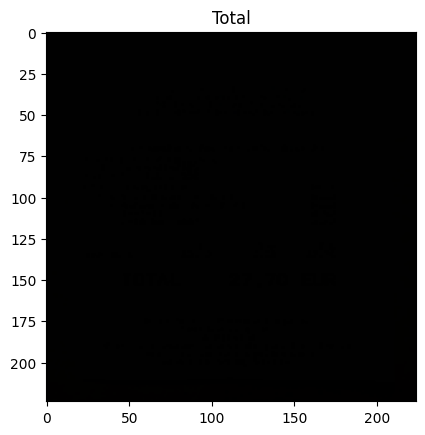

In [19]:
# # Make predictions
# y_pred = model.predict(X)
# class_idx = np.argmax(y_pred, axis=1)[0]
# class_name = list(classes.keys())[list(classes.values()).index(class_idx)]
# print(f'Predicted class: {class_name}')
# import matplotlib.pyplot as plt
# # Load the image and preprocess it
# file_path = 'C:/Users/Administrator/Desktop/EasyFact/Model/TF/9316628791.jpg'
# img = cv2.imread(file_path)
# # Preprocess the image
# img = cv2.resize(img, (img_height, img_width))
# img = img / 255.0
# img = np.expand_dims(img, axis=0)

# # Make a prediction with the model
# prediction = model.predict(img)[0][0]

# # Determine the predicted class
# if prediction >= 0.5:
#     predicted_class = 'Total'
# else:
#     predicted_class = 'Not Total'
# # convert image to 8-bit depth
# img = cv2.convertScaleAbs(img)

# # add text to the image
# # cv2.putText(img, y_train, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# # Display the image with the predicted label
# plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
# plt.title(predicted_class)
# plt.show()

In [ ]:
# display the image (optional)
cv2.imshow("Selected Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#save the model
model.save("EasyFact.h5")